# Actividad 1: Ingreso a la Universidad

## Contexto

Una importante universidad en el estado de Guanajuato promueve el cursar una maestría en Matemáticas [...]

## Indicaciones:

Realizar un análisis exploratodio de los datos con el fin de tener información relevante en cuanto al nivel que tienen los aspirantes a la maestría.

In [1]:
library(readxl)
cal_ingreso <- read_excel("datasets/Calif_ingreso.xlsx", sheet="Calif_ingreso")
cal_ingreso <- as.data.frame(cal_ingreso)
# Renombramos columna, porque no tiene nombre.
names(cal_ingreso)[2] <- "sexo"
cal_ingreso

New names:
* `` -> ...2


Nombre,sexo,geodif,ancompl,alg,anreal,estad
Jose,Hombre,36,58,43,36,37
Maria,Mujer,31,42,41,40,29
Luis,Hombre,76,78,69,66,81
Elena,Mujer,46,56,52,56,40
Franco,Hombre,12,42,38,38,28
Julio,Hombre,39,46,51,54,41
Karla,Mujer,22,32,43,28,22
Luisa,Mujer,9,40,47,30,24
Carolina,Mujer,64,75,70,66,63
Liliana,Mujer,36,38,58,62,62


1) ¿En alguna de las variables bajo estudio es posible identificar casos que podrían ser considerados como atípicos (outliers)? ¿En cuáles variables y cuántos casos tendría?

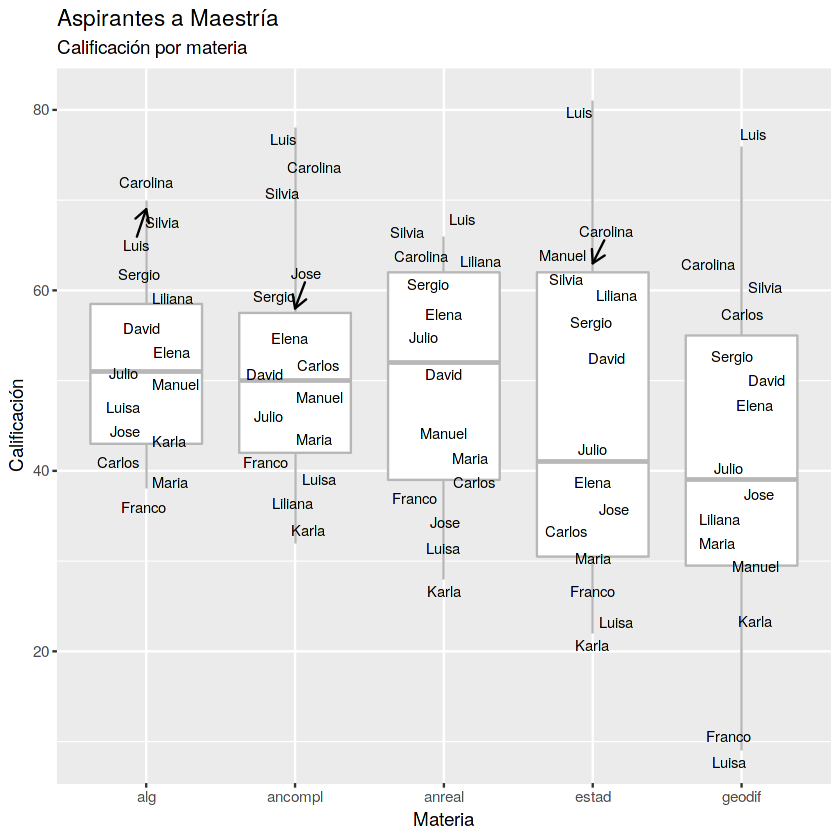

In [2]:
suppressMessages(library(dplyr))
library(tidyr)
library(ggplot2)
library(ggrepel)

cal_ingreso_long <- gather(cal_ingreso, materia, calificacion, -c(Nombre,sexo))


# Para boxplot, x tiene que ser categórica
ggplot(cal_ingreso_long, aes(x=materia, y=calificacion, label=Nombre))+
    geom_boxplot(color="#B7B7B7")+
    geom_text_repel(size=3, min.segment.length = 1, arrow = arrow(length=unit(0.02, "npc")) )+
    labs(
        title = "Aspirantes a Maestría"
        ,subtitle = "Calificación por materia"
        ,x = "Materia"
        ,y = "Calificación"
    )

$\color{teal}{\text{De lo anterior, tenemos:}}$

- $\color{teal}{\text{Luis es un outlier en casi todas las materias por tener las calificaciones más altas de}}$
$\color{teal}{\text{todo el grupo.}}$

- $\color{teal}{\text{Franco y Luisa son los outliers siendo las calificaciones más bajas en geometría diferencial}}$
$\color{teal}{\text{y las mas bajas en todas las materias}}$

2) Explorando más profundamente los datos, ¿existe evidencia que existen variables con alta correlación? Justifique la respuesta y en caso de ser afirmativa mencione los dos pares de variables más altamente correlacionadas.

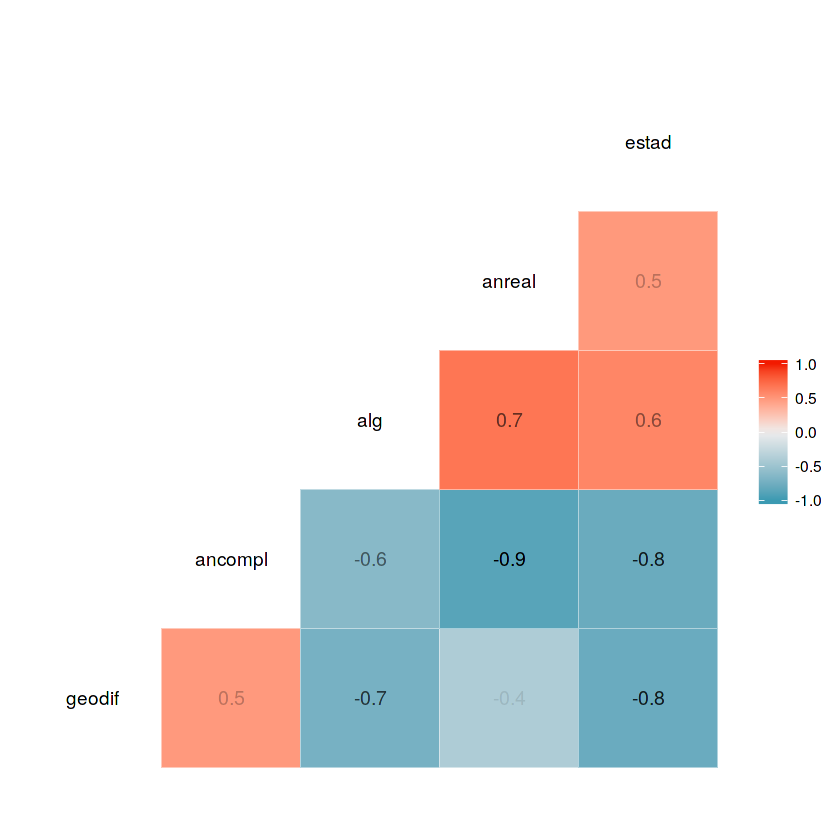

In [3]:
suppressMessages(library(GGally))
m_calif <- cal_ingreso[,-c(1,2)]
rownames(m_calif) <- cal_ingreso[,1]
#cor_materias <- m_calif
cor_materias <- cor(m_calif)
num_obs <- nrow(cal_ingreso)
ggcorr(cor_materias, label=TRUE, label_alpha = TRUE)

$\color{teal}{\text{En el mapa de calor de las correlaciones, obtenemos:}}$

  - $\color{teal}{\text{La más alta correlación negativa es entre análisis complejo y análisis real}}$
  
  - $\color{teal}{\text{Hay una alta correlación (negativa) entre estadística y geometría }}$
  $\color{teal}{\text{diferencial y análisis complejo}}$

3) A los integrantes del comité de ingreso les gustaría conocer si resulta verdadera la afirmación de que los hombres alcanzan mejores puntuaciones en las cinco áreas que las mujeres. Justifique su respuesta.

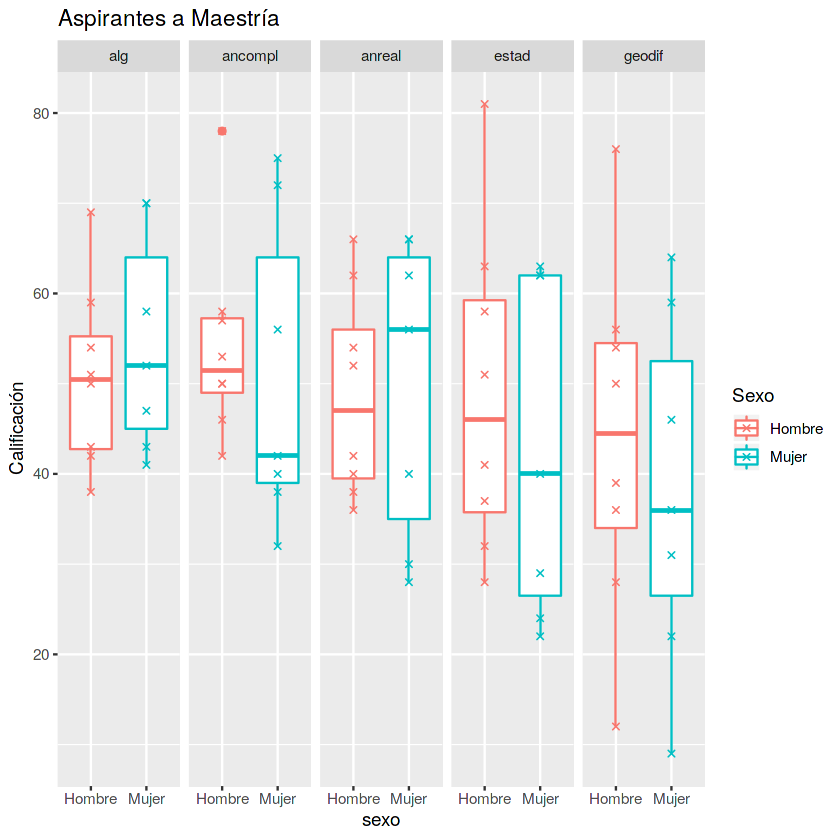

In [4]:
ggplot(cal_ingreso_long, aes(x=sexo, y=calificacion, color=sexo))+
    theme(axis.text.x=NULL)+
    geom_boxplot()+
    geom_point(shape=4)+
    facet_grid(.~materia)+    
    labs(
        title = "Aspirantes a Maestría"
        ,y = "Calificación"
        ,color = "Sexo"
    )

$\color{teal}{\text{Del gráfico anterior, obtenemos:}}$

- $\color{teal}{\text{El supuesto de que las mujeres tienen calificaciones más bajas es falso, ya que}}$
$\color{teal}{\text{en álgebra y análisis real, sus calificaciones son más altas en promedio.}}$

4) En el caso de que se dictamine el ingreso de los 15 aspirantes, una de las acciones que implementa la coordinación del programa para combatir la deserción escolar es ofrecer cursos de nivelación "personalizado" a los aspirantes dependiendo de los resultados del examen. Debido a que es prácticamente imposible asignar a cada aspirante un tutor por la falta de personal disponible ya que los cursos se estarían impartiendo durante el verano, se busca agrupar aquellos aspirantes que tuvieron un rendimiento similar en las cinco áreas evaluadas y asignarles un tutor que los ayude a revisar y alcanzar el nivel esperado. A partir de los datos proporcionados ¿existirán candidatos que presentan comportamiento similar (conocimiento) en las cinco áreas para formar los grupos de preparación? Justifique su respuesta y en caso de existir similitud entre candidatos, mencione algunos ejemplos.

In [5]:
# Si no se ordenan los datos, termina dibujando
# peces(?)
cal_ingreso_long <- cal_ingreso_long %>%
    arrange(materia, calificacion)

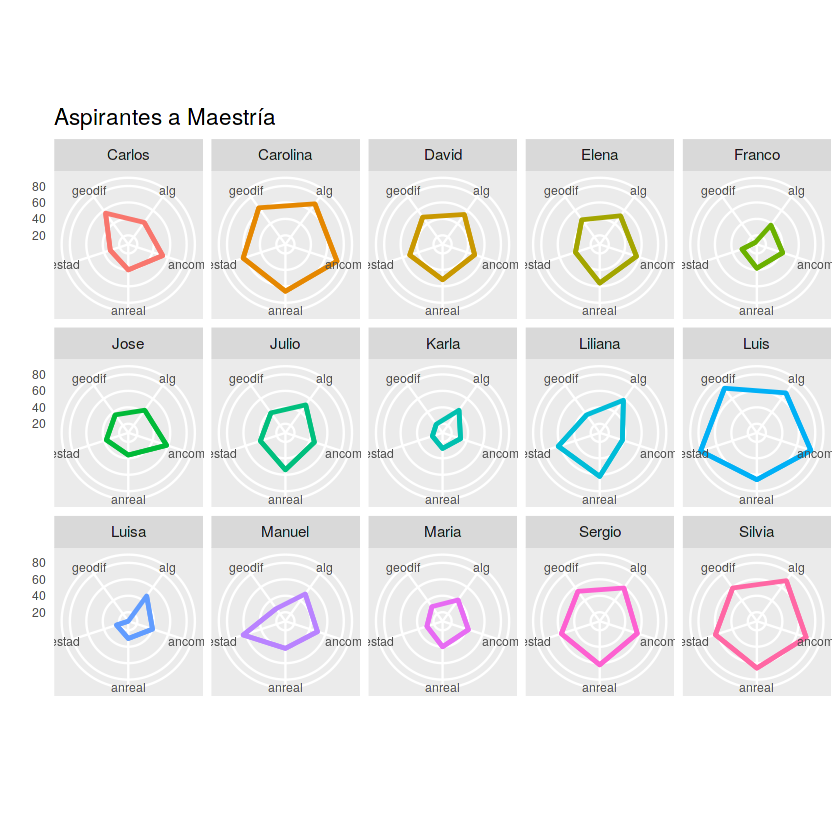

In [6]:
# Funcion para que las coord polares sean lineales.
# Obtenida de:
# http://www.cmap.polytechnique.fr/~lepennec/R/Radar/RadarAndParallelPlots.html
coord_radar <- function (theta = "x", start = 0, direction = 1) 
{
    theta <- match.arg(theta, c("x", "y"))
    r <- if (theta == "x") 
        "y"
    else "x"
    ggproto("CordRadar", CoordPolar, theta = theta, r = r, start = start, 
        direction = sign(direction),
        is_linear = function(coord) TRUE)
}

ggplot(cal_ingreso_long, aes(x=materia, y=calificacion, col=Nombre, group=Nombre)) +
    geom_polygon(fill=NA, size=1) +
    geom_line(size=1) +
    coord_radar()+
    facet_wrap(~Nombre, ncol=5)+
    theme(
        #strip.text.x = element_text(size = rel(0.8)),
        axis.text.x = element_text(size = rel(.8)),
        axis.ticks.y = element_blank(),
        axis.text.y = element_text(size = rel(.8)),
        legend.position = "none"
    )+
    labs(title = "Aspirantes a Maestría", x="", y="")  

$\color{teal}{\text{Del gráfico anterior:}}$

  - $\color{teal}{\text{Vemos que Silvia, Luis y Carolina son los alumnos con mejor desempeño en general.}}$
  
  - $\color{teal}{\text{Franco, Karla y Luisa (y tal vez María) son las personas con peor aprovechamiento en general y necesitan}}$  
    $\color{teal}{\text{cursos de nivelación.}}$